In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [ ]:
df = load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# Defining X and Y features
X = df.drop(['species'], axis=1)
y = df['species']

X.shape, y.shape

((150, 4), (150,))

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


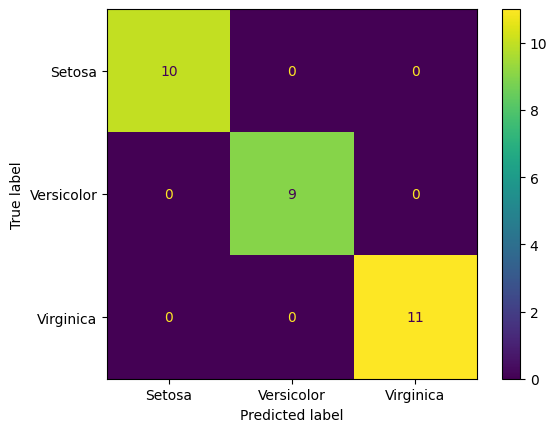

In [ ]:
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])

print("Confusion matrix: \n", cm)
disp.plot()
plt.show()

In [ ]:
cr = classification_report(y_test, prediction)
print("Classification report: \n", cr)

Classification report: 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# For Setosa
TP = cm[0,0]
FN = cm[0,1] + cm[0,2]
FP = cm[1,0] + cm[2,0]
TN = cm[1,1] + cm[1,2] + cm[2,1] +cm[2,2]

print("Setosa outcome values: ")
print(f"TP: {TP} \nFN: {FN} \nFP: {FP} \nTN: {TN}")

Setosa outcome values: 
TP: 10 
FN: 0 
FP: 0 
TN: 20


In [ ]:
# For Versicolor
TP = cm[1,1]
FN = cm[1,0] + cm[1,2]
FP = cm[0,1] + cm[2,1]
TN = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]

print("Versicolor outcome values: ")
print(f"TP: {TP} \nFN: {FN} \nFP: {FP} \nTN: {TN}")

Versicolor outcome values: 
TP: 9 
FN: 0 
FP: 0 
TN: 21


In [ ]:
# For Virginica
TP = cm[2,2]
FN = cm[2,0] + cm[2,1]
FP = cm[0,2] + cm[1,2]
TN = cm[0,0] + cm[0,1] + cm[1,1] + cm[1,0]

print("Virginica outcome values: ")
print(f"TP: {TP} \nFN: {FN} \nFP: {FP} \nTN: {TN}")

Virginica outcome values: 
TP: 11 
FN: 0 
FP: 0 
TN: 19


In [ ]:
print("Accuracy: ", accuracy_score(y_test, prediction))
print("Precision: ", precision_score(y_test, prediction, average='micro'))
print("Recall: ", recall_score(y_test, prediction, average='micro'))
print("F1 Score: ", f1_score(y_test, prediction, average='micro'))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
